In [0]:
!pip uninstall tensorflow

Uninstalling tensorflow-2.2.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.2.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.2.0


In [0]:
!pip install tensorflow==1.7.0

     |████████████████████████████████| 48.0MB 90kB/s 
     |████████████████████████████████| 3.1MB 40.3MB/s 
     |████████████████████████████████| 890kB 42.6MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=ac485c0067b29474e72ac22feb0cf1e9032ec3d02c33e96cab701a0f86142f4d
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2


In [0]:
!pip install tflearn

     |████████████████████████████████| 102kB 3.3MB/s 
  Created wheel for tflearn: filename=tflearn-0.3.2-cp36-none-any.whl size=128208 sha256=46a7489652ab9edd8db54ac5e5e5100290ad640b9571fe89f30ebd1d141e657f
  Stored in directory: /root/.cache/pip/wheels/d0/f6/69/0ef3ee395aac2e5d15d89efd29a9a216f3c27767b43b72c006
Successfully built tflearn


In [0]:
import tflearn as tf
import h5py
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or 

Instructions for updating:
Use the retry module or similar alternatives.


In [0]:
img_prep = tf.ImagePreprocessing()
img_prep.add_featurewise_zero_center(per_channel=True, mean=[ 0.38888048 , 0.43694749,  0.53946589])

img_aug = tf.ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_crop([49, 49], padding=4)

net = tf.input_data(shape=[None, 49, 49, 3],
                         data_preprocessing=img_prep,
                         data_augmentation=img_aug)
net = tf.conv_2d(net, 16, 3, regularizer='L2', weight_decay=0.0001)
net = tf.resnext_block(net, 5, 16, 32)
net = tf.resnext_block(net, 1, 32, 32, downsample=True)
net = tf.resnext_block(net, 4, 32, 32)
net = tf.resnext_block(net, 1, 64, 32, downsample=True)
net = tf.resnext_block(net, 4, 64, 32)
net = tf.batch_normalization(net)
net = tf.activation(net, 'relu')
net = tf.global_avg_pool(net)
net = tf.fully_connected(net, 2)
regression = tf.regression(net, optimizer='sgd',
              loss='mean_square',metric='R2', learning_rate=0.01)

Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


In [0]:
model = tf.DNN(net)

In [0]:
model.load('/content/model_resnet')

INFO:tensorflow:Restoring parameters from /content/model_resnet_-332000


[[0.7678354  0.22053422]]
[[-63.735493  -0.586157]]
[[-96.71615    -2.0354574]]
[[-130.14711     -3.4408443]]
[[-163.83878     -4.8229423]]
-2.7147655
0.7561038
dzr_sng_id                  632230
MSD_sng_id      SOBJBVD12A8C139767
MSD_track_id    TRSKUEP128F4294838
valence                   -2.07715
arousal                   0.828393
artist_name           Blu Cantrell
track_name                 Unhappy
Name: 603, dtype: object


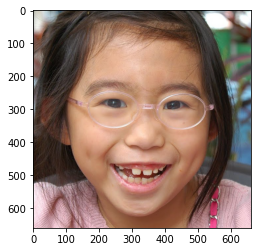

In [0]:
result = []
for path in os.listdir('/content/sample'):
  img = plt.imread('/content/sample/' + path)
  img = cv2.resize(img, (49, 49))
  img = img / 255.0
  img = img[np.newaxis, :]

  tmp = (music_va[:, 0] - predict_v) ** 2 + (music_va[:, 1] - predict_a) ** 2
  re = music_list.iloc[np.argmin(tmp),:]
  if path == '0da9ef7c8f852bac98b57d03926465c7312bf0d9accf1a4d56667112.jpg':
    print(predict_v)
    print(predict_a)
    print(re)
  

In [0]:
result = np.array(result).reshape(50, 2)

In [0]:
music_list = pd.read_csv('/content/train.csv')
music_list.head()

,dzr_sng_id,MSD_sng_id,MSD_track_id,valence,arousal,artist_name,track_name
0,213754,SORORTY12A67ADD67E,TRJIEJX12903CF2202,-0.682725,0.316758,Dark Tranquillity,Insanity's Crescendo
1,216752,SOVJXGK12A8AE4760C,TRLBHVY128F4242C31,-1.400403,1.538229,Anorexia Nervosa,Stabat mater dolorosa
2,239138,SOACXLC12AB018218D,TRQJZHB128F92FA42D,-1.935250,-0.655810,Jimmy Witherspoon,Ain't Nobody's Business
3,254391,SOUTMGD12A8AE47448,TRCXLKK128F42366BF,0.815393,0.662457,Uniting Nations,Out Of Touch
4,266313,SOTITAA12A6D4F8DA4,TRPMWQM128F932C0C8,1.257460,1.086515,The Walkmen,Brandy alexander


In [0]:
music_va = music_list.values[:, 3:5]

In [0]:
recommed = []
for predict_v, predict_a in result:
  tmp = (music_va[:, 0] - predict_v) ** 2 + (music_va[:, 1] - predict_a) ** 2
  recommed.append(np.argmin(tmp))

In [0]:
re = music_list.iloc[recommed,:]

In [0]:
re.values[29,:]

array([831289, 'SOTLPVB12CF5CFD7F3', 'TREUPHA128F4278F34', 0.753539713812,
       0.195378896997, 'Michael Jackson', 'Baby Be Mine'], dtype=object)

In [0]:
re.to_csv('/content/result.csv')

In [0]:
def predict(path):
  img = plt.imread('/content/sample/' + path)
  img = cv2.resize(img, (49, 49))
  img = img / 255.0
  plt.imshow(img)
  img = img[np.newaxis, :]
  predict_v = np.array(model.predict(img))[0, 0]
  predict_a = np.array(model.predict(img))[0, 1]
  tmp = (music_va[:, 0] - predict_v) ** 2 + (music_va[:, 1] - predict_a) ** 2
  print(np.argmin(tmp))
  re = music_list.iloc[np.argmin(tmp),:]
  return re

In [0]:
a = predict('060d0f2e63eaa88211d73d91b14b5c67c46641840014317a94f9948d.jpg')

In [0]:
r = []
for i in os.listdir('/content/sample'):
  r.append(predict(i))

7734


dzr_sng_id                             13488338
MSD_sng_id                   SOLLTVP12A6310F136
MSD_track_id                 TRRVIYD128E0780DB9
valence                               -0.225649
arousal                                0.591013
artist_name                             Placebo
track_name      Every You Every Me (Single Mix)
Name: 7734, dtype: object

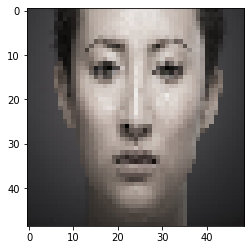

In [0]:
predict('ckupload_20180222001100_a single tear.jpg')

9147


dzr_sng_id                61381927
MSD_sng_id      SONHQTE12A6D4FAF92
MSD_track_id    TRAQPLF128E0781843
valence                   0.771732
arousal                   0.964829
artist_name          Sondre Lerche
track_name            On The Tower
Name: 9147, dtype: object

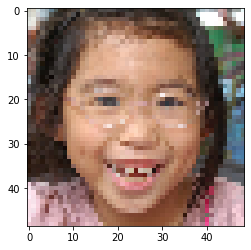

In [0]:
predict('0da9ef7c8f852bac98b57d03926465c7312bf0d9accf1a4d56667112.jpg')

dzr_sng_id                15424770
MSD_sng_id      SOMPHAS12A6D4F6D6D
MSD_track_id    TRZNYFO128F4214AE8
valence                  -0.300691
arousal                   0.978196
artist_name                   Lamb
track_name                     Sun
Name: 8216, dtype: object


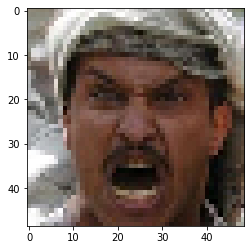

In [0]:
predict('1ca3065b209c016f139b8a71bced88ff3539b5b9c8e92ff5da51a733.jpg')

dzr_sng_id                17967645
MSD_sng_id      SOABAVP12A6D4F3DF3
MSD_track_id    TRFTQOF128F1456ACA
valence                  -0.251573
arousal                   0.809956
artist_name                   Poco
track_name              Crazy Love
Name: 8673, dtype: object


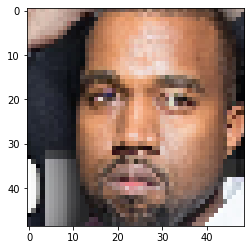

In [0]:
predict('0b8b3e09408a629360678383384fc67b738e3a21039eec8505e1accc.jpg')

dzr_sng_id                 65707240
MSD_sng_id       SOYGMAU12A6D4F6388
MSD_track_id     TRQEBJR128F92E334B
valence                   -0.246115
arousal                     1.00355
artist_name            Black Crowes
track_name      She Talks To Angels
Name: 9436, dtype: object


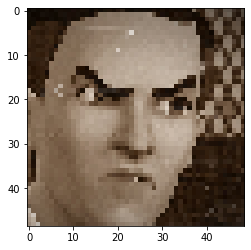

In [0]:
predict('5244ada08581e02b31b4ecf30bb9251337a1a499589e32e913b0dc30.jpg')